In [1]:
from scipy.linalg import orth
from sympy.matrices import Matrix
import sympy
import numpy as np
from sympy import init_printing
init_printing()

# Initialize different matrixes

In [2]:
#A = np.array([[0, 1], [1, 0]]); symA = Matrix(A)  
A = np.array([[1, 2], [3, 4]]); symA = Matrix(A)  
A

array([[1, 2],
       [3, 4]])

In [3]:
symA

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

#1. What is dimension of col(A)?

In [4]:
np.linalg.matrix_rank(A)

2

In [5]:
symA.rank()

In [6]:
symA.columnspace()

⎡⎡1⎤  ⎡2⎤⎤
⎢⎢ ⎥, ⎢ ⎥⎥
⎣⎣3⎦  ⎣4⎦⎦

#2. is A orthogonal?

In [7]:
np.allclose(A.T @ A, np.eye(A.shape[0]))

False

#3. compute its l1 norm

Norm

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html

In [8]:
np.linalg.norm(A, ord=1)

In [9]:
np.linalg.norm(A, ord=2)

In [10]:
np.linalg.norm(A, ord=np.inf)

In [11]:
import math
from math import sqrt
sqrt(30)

In [12]:
sqrt(sqrt(221) + 15)

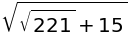

In [13]:
symA.norm(ord=2)

In [14]:
symA.norm()

In [15]:
# symA.norm(ord=1)
# symA.norm(1) # fails

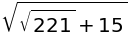

In [16]:
# symA.norm(ord=1) # fails
# symA.norm(1) # fails
symA.norm(2)

#4. compute Ainv

In [17]:
np.linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [18]:
symA.inv()

⎡-2    1  ⎤
⎢         ⎥
⎣3/2  -1/2⎦

#5. compute At

In [19]:
A.T

array([[1, 3],
       [2, 4]])

In [20]:
A.transpose()

array([[1, 3],
       [2, 4]])

In [21]:
symA.T

⎡1  3⎤
⎢    ⎥
⎣2  4⎦

In [22]:
symA.transpose()

⎡1  3⎤
⎢    ⎥
⎣2  4⎦

#6. compare Ainv to At

In [23]:
np.allclose(A.T, np.linalg.inv(A))

False

In [24]:
np.isclose(A.T, np.linalg.inv(A))

array([[False, False],
       [False, False]])

In [25]:
A.T - np.linalg.inv(A)

array([[3. , 2. ],
       [0.5, 4.5]])

#7. compute l1 norm of Ainv and A

In [26]:
normAinv = np.linalg.norm(np.linalg.inv(A), ord=1)
normAinv

In [27]:
normA = np.linalg.norm(A, ord=1)
normA

Condition number by multiplication normAinv * normA

In [28]:
normAinv * normA

#8. compute its condition number

In [29]:
np.linalg.cond(A, p=1)

#9. compute AtA

In [30]:
A.T @ A

array([[10, 14],
       [14, 20]])

check A for orthogonality by comparing AtA to an identity matrix

In [31]:
np.allclose(A.T @ A, np.identity(A.shape[1]))

False

#10. compute its l1 norm

In [32]:
np.linalg.norm(A.T @ A, ord=1)

#11. compute its inverse AtAinv

In [33]:
np.linalg.inv(A.T @ A)

array([[ 5. , -3.5],
       [-3.5,  2.5]])

In [34]:
np.allclose(np.linalg.inv(A.T @ A), np.identity(A.shape[1]))

False

#12. compute l1 norm of AtAinv 

In [35]:
np.linalg.norm(np.linalg.inv(A.T @ A), ord=1)

#13. compute condition number of AtA

In [36]:
np.linalg.cond(A.T @ A, p=1)

Check it by multiplication

In [37]:
np.linalg.norm(np.linalg.inv(A.T @ A), ord=1) * np.linalg.norm(A.T @ A, ord=1)

#14. compare condition numbers of A and AtA

In [38]:
np.linalg.cond(A, p=1), np.linalg.cond(A.T @ A, p=1)

------------------------------------------

#projection of a vector onto a vector

Denote
a = (1, 2)T, b = (3, 4)T. 
Compute 
proj a  b

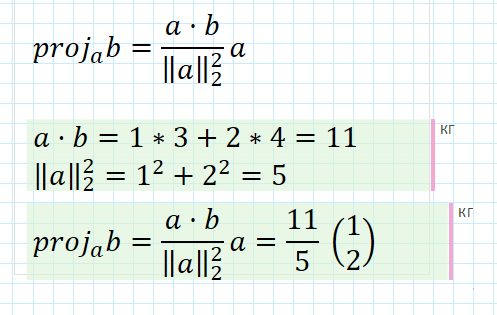

In [39]:
a = np.array([1, 2])
b = np.array([3, 4])
np.dot(a, b) / (np.linalg.norm(a)**2)

In [40]:
11/5 == 2.2

True

In [41]:
(np.dot(a, b) / np.linalg.norm(a)**2)*a

array([2.2, 4.4])

#Gram-Schmidt

Denote
v1 = (1, 0, 0)
v2 = (1, 1, 0)
v3 = (1, 1, 1)


Orthogonzlize it, giving a1, a2, a3. 

In [42]:
v1 = np.array([1, 0, 0])
v2 = np.array([1, 1, 0])
v3 = np.array([1, 1, 1])

In [43]:
a1 = np.copy(v1)

In [44]:
(np.dot(v2, a1) / (np.linalg.norm(a1))**2)*a1

array([1., 0., 0.])

In [45]:
a2 = v2 - (np.dot(v2, a1) / np.linalg.norm(a1)**2)*a1
a2

array([0., 1., 0.])

In [46]:
a3 = v3 - np.dot(v3, a1) / np.linalg.norm(a1)*a1 - np.dot(v3, a2) / np.linalg.norm(a2)*a2
a3

array([0., 0., 1.])

---------------------------- 

stopped here



#Projection of a vector onto a plain

In [47]:
v1 = np.array((1, 0, 0))
v2 = np.array((1, 1, 0))
b = np.array((1, 2, 3))

In [48]:
a1 = np.copy(v1)

In [49]:
a2 = v2 - (np.dot(v2, a1) / np.linalg.norm(a1)**2)*a1
a2

array([0., 1., 0.])

## 5. Compute proj a1 b

In [50]:
proj_b_on_a1 = (np.dot(b, a1) / (np.linalg.norm(a1))**2)*a1
proj_b_on_a1

array([1., 0., 0.])

##6. Compute proj a2 b

In [51]:
proj_b_on_a2 = (np.dot(b, a2) / (np.linalg.norm(a2))**2)*a2
proj_b_on_a2

array([0., 2., 0.])

##7. Compute bHat = proj {a1, a2} b

In [52]:
bHat = proj_b_on_a1 + proj_b_on_a2
bHat

array([1., 2., 0.])

##8. Find a residual vector r = b - bHat

In [53]:
r = b - bHat
r

array([0., 0., 3.])

##9. Compute the following dot products

		a. (v1.v2) = 1
		b. (a1.a2)= 0
		c. (r.v1) = 0
		d. (r.v2)=0
		e. (r.a1)=0
		f. (r.a2)=0
		g. (r.b)=9
        h. (r.bHat)=0

In [54]:
vectors1 = [v1, a1, r, r, r, r, r, r]
vectors2 = [v2, a2, v1, v2, a1, a2, b, bHat]


In [55]:
labels = ["v1 dot v2: ",
"a1 dot a2: ",
"r dot v1: ",
"r dot v2: ",
"r dot a1: ",
"r dot a2: ",
"r dot b: ",
"r dot bHat "] 
for i,j,k in zip(vectors1, vectors2, labels):
  print(k, str(i.dot(j)))

v1 dot v2:  1
a1 dot a2:  0.0
r dot v1:  0.0
r dot v2:  0.0
r dot a1:  0.0
r dot a2:  0.0
r dot b:  9.0
r dot bHat  0.0


In [56]:
v1.dot(v2)

1

In [57]:
a1.dot(a2)

In [58]:
r.dot(v1)

In [59]:
r.dot(v2)

In [60]:
r.dot(a1)

In [61]:
r.dot(a2)

In [62]:
r.dot(b)

In [63]:
r.dot(bHat)

##10. Check the following orthogonality statements
(Choose all that apply. None, one or more items can be chosen)

		a. v1 \orth v2 False
		b. a1 \orth a2 True
		c. r \orth v1 True
		d. r \orth v2 True
		e. r \orth a1True
		f. r \orth a2True
		g. r\orth b False 
		h. r\orthbHat True


In [64]:
labels = ["v1 orth v2: ",
"a1 orth a2: ",
"r orth v1: ",
"r orth v2: ",
"r orth a1: ",
"r orth a2: ",
"r orth b: ",
"r orth bHat: "] 

for i,j,k in zip(vectors1, vectors2, labels):
  print(k, str(not i.dot(j)))

v1 orth v2:  False
a1 orth a2:  True
r orth v1:  True
r orth v2:  True
r orth a1:  True
r orth a2:  True
r orth b:  False
r orth bHat:  True


In [65]:
not v1.dot(v2)

False

In [66]:
not a1.dot(a2)

True

In [67]:
not r.dot(v1)

True

In [68]:
not r.dot(v2)

True

In [69]:
not r.dot(a1)

True

In [70]:
not r.dot(a2)

True

In [71]:
not r.dot(b)

False

In [72]:
not r.dot(bHat)

True

stopped
#simple 2 by 2 QR examples

In [73]:
M = np.array([[1, 0], [0, 1]])
M = Matrix(M)

In [74]:
Q, R = M.QRdecomposition()
Q, R

⎛⎡1  0⎤  ⎡1  0⎤⎞
⎜⎢    ⎥, ⎢    ⎥⎟
⎝⎣0  1⎦  ⎣0  1⎦⎠

In [75]:
M = np.array([[1, 1], [0, 1]])
M = Matrix(M)

In [76]:
Q, R = M.QRdecomposition()
Q, R

⎛⎡1  0⎤  ⎡1  1⎤⎞
⎜⎢    ⎥, ⎢    ⎥⎟
⎝⎣0  1⎦  ⎣0  1⎦⎠

In [77]:
M = np.array([[0, 0], [0, 0]])
#M = Matrix(M)

In [78]:
%%script false
Q, R = M.QRdecomposition()
Q, R

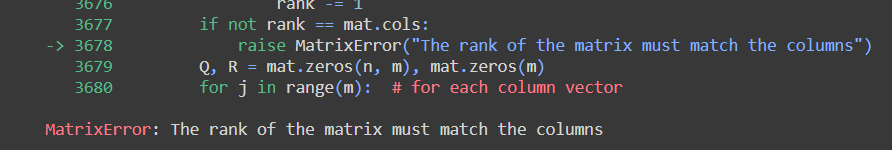

In [79]:
Q, R = np.linalg.qr(M)
Q, R

(array([[1., 0.],
        [0., 1.]]), array([[0., 0.],
        [0., 0.]]))

# Invertible 2 by 2 QR example

In [80]:
M = Matrix([[1, 1], [1, 0]])
M.QRdecomposition()

⎛⎡√2   √2 ⎤  ⎡    √2⎤⎞
⎜⎢──   ── ⎥  ⎢√2  ──⎥⎟
⎜⎢2    2  ⎥  ⎢    2 ⎥⎟
⎜⎢        ⎥, ⎢      ⎥⎟
⎜⎢√2  -√2 ⎥  ⎢    √2⎥⎟
⎜⎢──  ────⎥  ⎢0   ──⎥⎟
⎝⎣2    2  ⎦  ⎣    2 ⎦⎠

#Rectangular easy matrix QR (no scaling)

In [81]:
M = Matrix([[1, 1], [0, 1], [0, 0]])
M.QRdecomposition()

⎛⎡1  0⎤        ⎞
⎜⎢    ⎥  ⎡1  1⎤⎟
⎜⎢0  1⎥, ⎢    ⎥⎟
⎜⎢    ⎥  ⎣0  1⎦⎟
⎝⎣0  0⎦        ⎠

In [82]:
v1 = np.array([1, 0, 0])
v2 = np.array([1, 1, 0])

In [83]:
a1 = np.copy(v1)
a2 = v2 - (np.dot(v2, a1) / (np.linalg.norm(a1))**2)*a1
a2

array([0., 1., 0.])

#Householder 2 by 2

##Question 9

In [84]:
M = np.array([[1, 0], [0, -1]])
v = np.array([0, 1])
M @ v

array([ 0, -1])

##Question 11

In [85]:
H = np.array([[1, 0], [0, -1]])
v = np.array([0, 1])
H @ v

array([ 0, -1])

#K: Householder 2 by 2 new numbers

##Question 9

In [86]:
H = np.array([[1, 0], [0, -1]])
u = np.array([1, 0])
H @ u

array([1, 0])

#K: Rectangular not easy matrix QR 

In [87]:
A = np.array([[2, -5],
              [3, 3],
              [6, -1]])
Q, R = np.linalg.qr(A)

In [88]:
Q

array([[-0.28571429,  0.80849333],
       [-0.42857143, -0.58799515],
       [-0.85714286,  0.0244998 ]])

In [89]:
R

array([[-7.        ,  1.        ],
       [ 0.        , -5.83095189]])

In [90]:
A_sym = Matrix(A)
A_sym.QRdecomposition()

⎛⎡     -33⋅√34 ⎤          ⎞
⎜⎢2/7  ────────⎥          ⎟
⎜⎢       238   ⎥          ⎟
⎜⎢             ⎥          ⎟
⎜⎢      12⋅√34 ⎥  ⎡7  -1 ⎤⎟
⎜⎢3/7   ────── ⎥, ⎢      ⎥⎟
⎜⎢       119   ⎥  ⎣0  √34⎦⎟
⎜⎢             ⎥          ⎟
⎜⎢      -√34   ⎥          ⎟
⎜⎢6/7   ─────  ⎥          ⎟
⎝⎣       238   ⎦          ⎠

In [91]:
v1 = np.array([2,3,6])
v2 = np.array([-5, 3, -1])

In [92]:
a1 = v1 / np.linalg.norm(v1)
a1

array([0.28571429, 0.42857143, 0.85714286])

In [93]:
_a2 = v2 - v1.dot(a1) / (np.linalg.norm(a1)**2) * a1
_a2

array([-7.0000000e+00, -4.4408921e-16, -7.0000000e+00])

In [94]:
a2 = _a2 / np.linalg.norm(_a2)
a2

array([-7.07106781e-01, -4.48597845e-17, -7.07106781e-01])

In [95]:
a1.dot(a2)

-------------------------------

curiosity about QR decomposition of a matrix with incomplete column rank

In [96]:
unitMatrix = np.array([[1, 1], [1, 1]])
Q, R = np.linalg.qr(unitMatrix)
Q, R

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([[-1.41421356e+00, -1.41421356e+00],
        [ 0.00000000e+00, -4.74426853e-17]]))

In [97]:
Q @ R

array([[1., 1.],
       [1., 1.]])

In [98]:
symUnitMatrix = Matrix(unitMatrix)
#symUnitMatrix.QRdecomposition()

In [99]:
rWithZero = np.copy(R)
rWithZero[1, 1] = 0
rWithZero

array([[-1.41421356, -1.41421356],
       [ 0.        ,  0.        ]])

In [100]:
Q @ rWithZero

array([[1., 1.],
       [1., 1.]])

-------------------

#How to create random orthonormal matrix in python numpy


In [101]:
from scipy.stats import ortho_group  # Requires version 0.18 of scipy

m = ortho_group.rvs(dim=3)
m

array([[-0.47803175, -0.14502876, -0.8662865 ],
       [-0.22848831, -0.93178595,  0.28207807],
       [ 0.84810302, -0.33277861, -0.41228589]])

#Detect orthogonality

In [102]:
np.allclose(m.T @ m, np.eye(m.shape[0]))

True

In [103]:
non_orth = np.random.randn(3, 3)
non_orth

array([[ 0.22490312,  0.06246645, -0.16157209],
       [-0.57631993,  0.68586136,  1.55585179],
       [-0.10909174,  0.356317  , -0.17927633]])

In [104]:
np.allclose(non_orth.T @ non_orth, np.eye(non_orth.shape[0]))

False